In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

plt.rcParams.update({"font.size": 14})

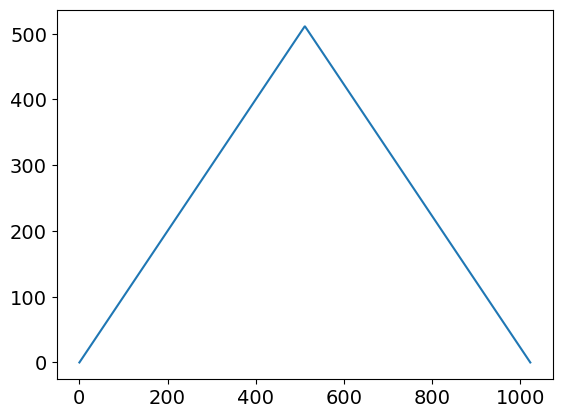

In [2]:
# Generate a nice frequency response.
a = np.arange(512)
b = np.arange(511, -1, -1)
X = np.concatenate([a, b])
plt.plot(X)

In [3]:
# What the signal looks like doesn't matter.
x = np.fft.ifft(np.fft.ifftshift(X))

In [4]:
def do_fft(arr):
    return np.fft.fftshift(np.fft.fft(arr))


def plot_fft(arr, label=None):
    fft = np.abs(do_fft(arr))
    xaxis = np.fft.fftshift(np.fft.fftfreq(fft.size, d=1 / np.pi))
    plt.plot(xaxis, fft / np.max(fft), label=label)
    plt.xlabel(r"$\omega$ [rad/sample]")
    plt.ylabel("Magnitude (normalized)")

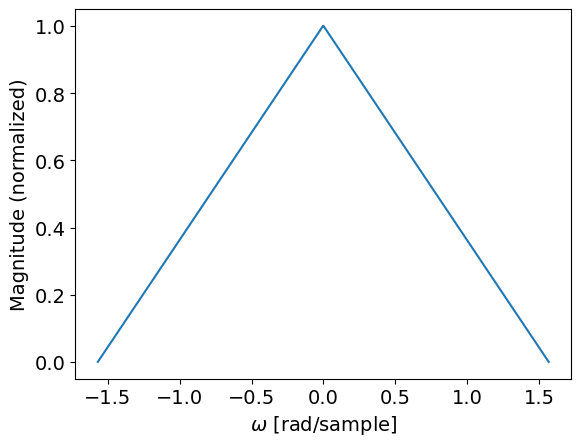

In [5]:
plot_fft(x)

In [6]:
assert np.allclose(do_fft(x), X)

<StemContainer object of 3 artists>

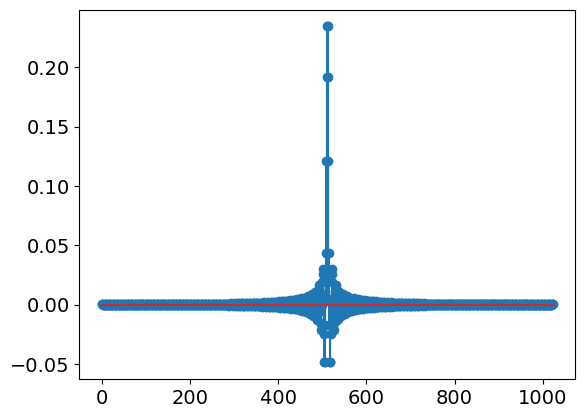

In [7]:
# Design a low-pass FIR filter, with a cut-off frequency at 0.24π.
fir = signal.firwin(1024, 0.24)
plt.stem(fir)

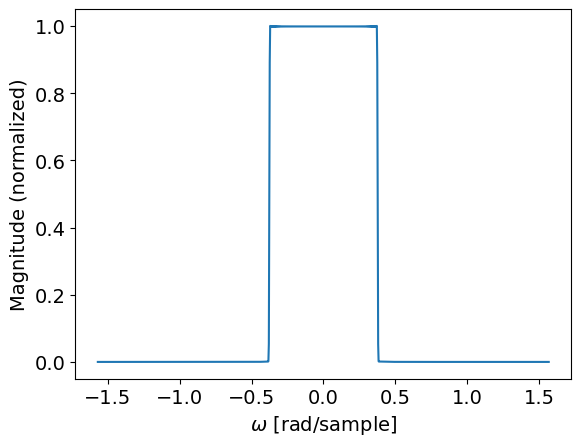

In [8]:
plot_fft(fir)

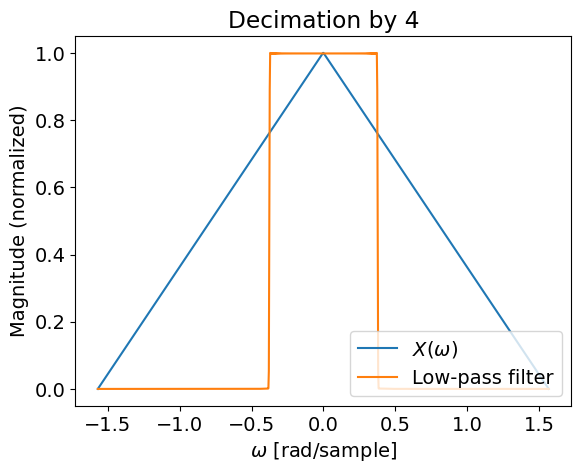

In [9]:
plot_fft(x, r"$X(\omega)$")
plot_fft(fir, "Low-pass filter")
plt.legend(loc="lower right")
plt.title("Decimation by 4")
plt.show()
# plt.savefig("resampling_decimation.pdf")

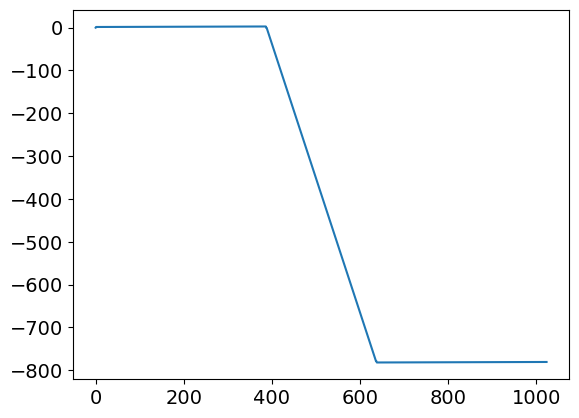

In [10]:
# This is a linear phase filter (no phase distortion but non-zero group delay).
plt.plot(np.unwrap(np.angle(do_fft(fir))))

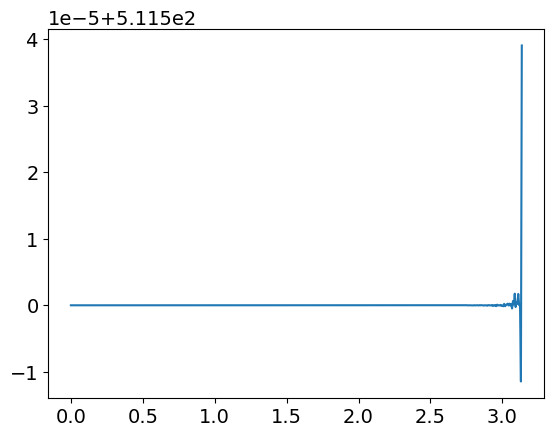

In [11]:
# Hopefully constant group delay (in samples).
plt.plot(*signal.group_delay((fir, 1)))

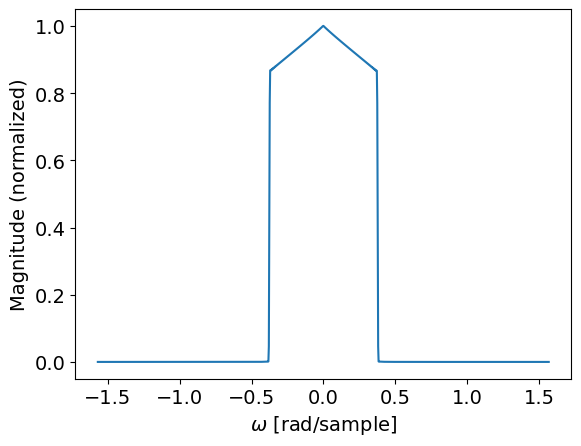

In [12]:
# Need to low-pass filter the signal before decimating, to avoid aliasing.
x_lp = signal.lfilter(fir, 1, x)
plot_fft(x_lp)

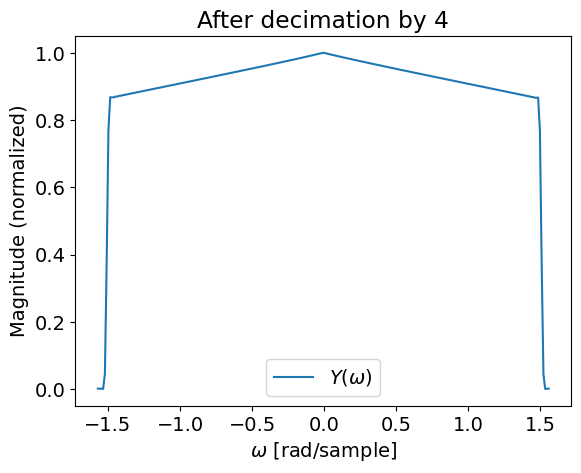

In [13]:
# Downsampling factors > 4 result in aliasing.
y_d = x_lp[::4]
plot_fft(y_d, r"$Y(\omega)$")
plt.legend()
plt.title("After decimation by 4")
plt.show()

<StemContainer object of 3 artists>

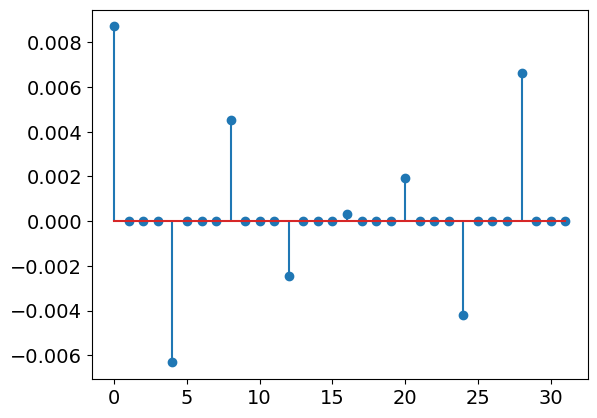

In [14]:
# Interpolate by inserting zeros first.
v_i = np.zeros(y_d.size * 4, dtype=np.cdouble)
v_i[::4] = y_d
plt.stem(np.real(v_i[:32]))

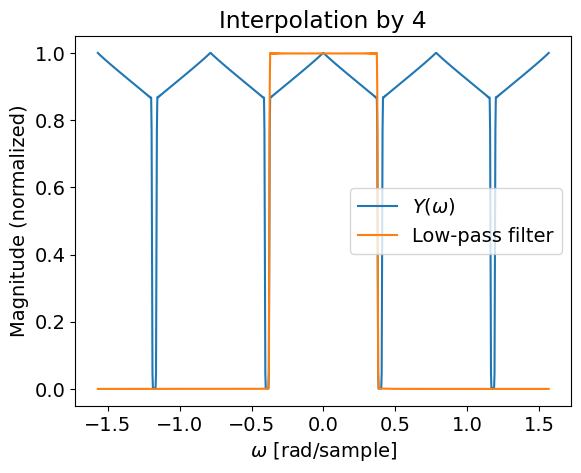

In [15]:
# This results in aliasing!
plot_fft(v_i, r"$Y(\omega)$")
plot_fft(fir, "Low-pass filter")
plt.legend(loc="center right")
plt.title("Interpolation by 4")
plt.show()
# plt.savefig("resampling_interpolation.pdf")

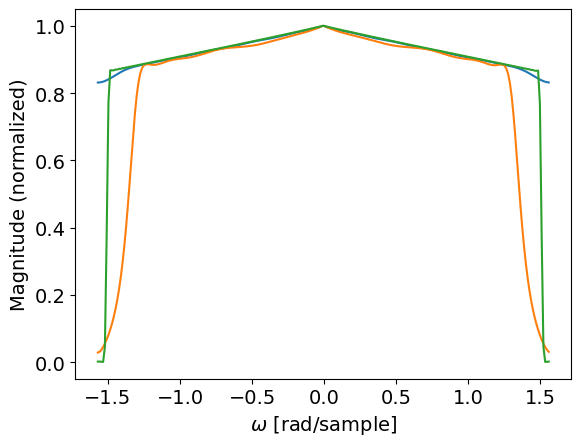

In [17]:
plot_fft(signal.decimate(x, 4, ftype="fir", zero_phase=False))
plot_fft(signal.decimate(x, 4, ftype="iir", zero_phase=False))
plot_fft(y_d)